# Demo - SciKit Learn
* popular Python library providing efficient implementation of a large number of machine learning algorithms
* purposely designed to be clean and uniform across tools
* consistent data representation and common interface

# SciKit Learn Data Representation
<img style="height: 400px;" src="images/scikit-learn-data.png">

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

np.random.seed(5)

# load the iris dataset that ships with scikit learn
iris = datasets.load_iris()
dat = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                   columns= iris['feature_names'] + ['target'])
dat

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [2]:
# Set up the feature matrix
X_iris = dat.drop('target', axis=1)
X_iris.shape

(150, 4)

In [3]:
# Set up the target vector
y_iris = iris['target']
y_iris.shape

(150,)

# scikit-learn Objects
* "All objects within scikit-learn share a uniform common basic API consisting of three complementary interfaces: an estimator interface for building and fitting models, a predictor interface for making predictions and a transformer interface for converting data."
<br>__*API design for machine learning software:
experiences from the scikit-learn project*__ (https://arxiv.org/pdf/1309.0238.pdf)

# Estimator API
* Driven by a set of principles documented in the above paper:
  * Consistency
  * Allow Inspection
  * Limited object hierarchies
  * Composition
  * Sensible defaults

# General Workflow
* Choose a model
* Choose model hyperparameters
* Arrange data into a features matrix and target vector
* Fit the model to the data with the __`fit()`__ method
* Apply the model to test data (__`predict()`__ or __`transform()`__)

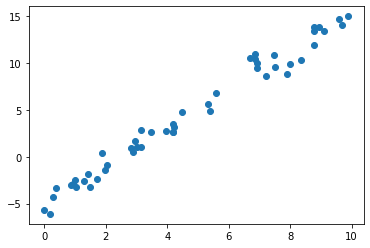

In [4]:
# Linear Regression Example from Python Data Science Handbook
# First, generate some sample data
# We'll add some random noise so the points are scattered
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)

# generate some randomness in the y axis
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

Model slope:     2.027208810360695
Model intercept: -4.998577085553202


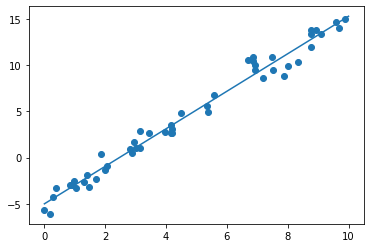

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# the data needs to be of the form [n_samples, n_features]
# so we add a new axis to generate a 2-D array from x
model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
# same for xfit...
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

In [6]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=2)

tree_clf.fit(X_iris, y_iris)
tree_clf.predict([[5, 1.5, 2, 2.0]]), iris.target_names

(array([2]), array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

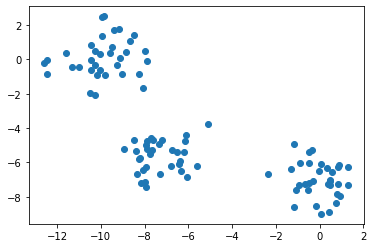

In [7]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# create 100 random data points in 3 isotropic (uniform in all dimensions) blobs
X, y = make_blobs(random_state=9)
plt.scatter(X[:, 0], X[:, 1]);

[1 2 0 0 2 2 2 0 1 2 1 2 1 1 0 1 1 1 2 1 2 1 2 0 2 0 0 2 2 1 2 1 0 0 2 0 1
 1 2 2 0 2 0 2 0 1 2 0 0 1 2 1 1 2 2 1 1 2 2 2 1 2 2 0 0 2 0 0 0 0 0 2 1 0
 1 0 1 0 0 2 0 0 2 1 2 1 0 1 1 1 0 0 0 1 2 1 1 1 0 2]


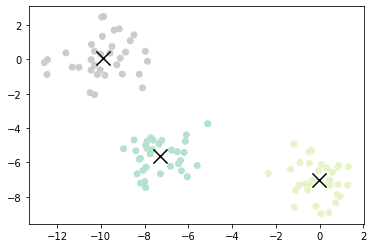

In [8]:
# Now let's do a K-means clustering...
# Since we made 3 blobs, the algorithm should do well with 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
print(kmeans.labels_)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='Pastel2')
centers = kmeans.cluster_centers_
# mark the centers of each cluster, as determined by the K-means algorithm
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, marker='x');

[2 4 3 3 4 1 4 0 2 4 2 1 2 2 3 2 2 2 4 2 1 2 1 3 1 0 3 1 1 2 1 2 3 0 1 3 2
 2 4 4 3 4 0 1 3 2 4 3 3 2 4 2 2 1 1 2 2 1 1 1 2 4 1 3 0 4 0 3 3 3 3 4 2 3
 2 3 2 0 3 4 0 0 1 2 1 2 3 2 2 2 0 0 3 2 1 2 2 2 0 1]


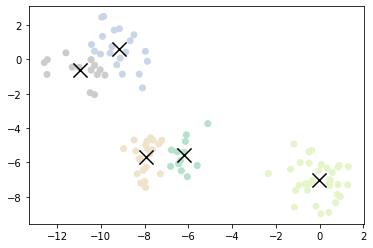

In [9]:
# let's try it with 5 clusters
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
print(kmeans.labels_)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='Pastel2')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, marker='x');